# The Lorenz Attractor
Flora Hess (flora.hess@stud.uni-heidelberg.de)<br/>Leonardo K. Reiter (leonardo.reiter@stud.uni-heidelberg.de)<br/>Jason G. Jun (jun.jasongabriel@stud.uni-heidelberg.de)

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from scipy.integrate import odeint
from scipy.signal import find_peaks as peaks
%matplotlib inline

plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams["figure.figsize"] = 10, 10
plt.rcParams["axes.titlesize"] = 20
plt.rcParams["axes.labelsize"] = 10
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.facecolor"] = (0.5, 0.5, 0.5)
plt.rcParams["axes.edgecolor"] = (1.0, 1.0, 1.0)
plt.rcParams["scatter.marker"] = "."
plt.rcParams["lines.linewidth"] = .5
plt.rcParams["grid.color"] = (0.6, 0.6, 0.6)
plt.rcParams["grid.linestyle"] = (3, 1)
plt.rcParams["legend.facecolor"] = (1., 1., 1.)
plt.rcParams["legend.fontsize"] = 7
plt.rcParams["font.family"] = "serif"
plt.rcParams["xtick.bottom"] = False
plt.rcParams["xtick.labelbottom"] = True
plt.rcParams["xtick.labeltop"] = False
plt.rcParams["xtick.labelsize"] = 7.5
plt.rcParams["ytick.labelsize"] = 7.5
plt.rcParams["xtick.top"] = True
plt.rcParams["ytick.labelleft"] = True
plt.rcParams["ytick.left"] = True
# print(plt.rcParams.keys())

The Lorenz attractor problem is given by the following coupled set of differential equations:
$$
\begin{aligned}
\dot{x} &=-\sigma(x-y) \\
\dot{y} &=r x-y-x z \\
\dot{z} &=x y-b z
\end{aligned}
$$
As discussed in the lecture, the fixed points are $(0,0,0)$ for all $r$, and (for $r>1$ ) the points $C_{\pm}=\left(\pm a_{0}, \pm a_{0}, r-1\right)$ with $a_{0}=\sqrt{b(r-1)}$. For the entire exercise, please use $\sigma=10$ and $b=8 / 3$. The value of $r$ can be experimented with. When you create numerical
solutions you can make plots in 2-D projection (e.g. in the $x-y$ or $x-z$ plane). You can also try a full 3-D plot.

In [30]:
def f(y, t, r, b=8/3, s=10):
    return np.array([s * (y[1] - y[0]), y[0] * (r - y[2]) - y[1], y[0] * y[1] - b * y[2]])


def get_y0s(r, b=8/3):
    if r < 1:
        y0s = np.array([[0.,0.,0.]])
    if r > 1:
        a0 = np.sqrt(b * (r - 1.))
        y0s = np.array([[  0,  0,   0],
                        [+a0,+a0, r-1],
                        [-a0,-a0, r-1]])
    return y0s

## Task 1:
Solve numerically, using rk4, the above coupled set of equations for the values $r=0.5,1.3,1.7,23.0$ and $27.0$ Choose the initial conditions near one of the fixed points: $C_{\pm}$ for $r>1$ and $(0,0,0)$ for $r<1$. Explain the behavior, as much as possible, with the stability properties of the fixed points.

In [28]:
def rk4_step(y0, t0, f, h, r):
    k1 = h * f(y0, t0, r)
    k2 = h * f(y0 + k1/2., t0 + h/2., r)
    k3 = h * f(y0 + k2/2., t0 + h/2., r)
    k4 = h * f(y0 + k3, t0 + h, r)
    tp1 = t0 + h
    yp1 = y0 + 1./6.*(k1 + 2.*k2 + 2.*k3 + k4)
    return(yp1,tp1)


def rk4(y0, t0, f, h, n, r):
    yn = np.zeros((n+1, y0.shape[0]))
    tn = np.zeros(n+1)
    yn[0,:] = y0
    tn[0] = t0
    for n in np.arange(1,n+1,1):
        yn[n,:], tn[n] = rk4_step(yn[n-1,:], tn[n-1], f, h, r)
    return (yn, tn)


def get_traj(y0, t0, r):
    h, T = 1e-3, 60
    n, dist = int(1/h) * T, .1
    return rk4(y0+dist, t0, f, h, n, r)


def plot_lorenz(rs):
    for r in rs:
        y0s = get_y0s(r)
        fig, ax = plt.figure(), plt.axes(projection="3d")
        for i in range(len(y0s)):
            ys, ts = get_traj(y0s[i], 0, r)
            c = plt.cm.get_cmap("hsv")(i / len(y0s))
            ax.scatter3D( *ys[0], s=50, color=c, label="")
            ax.scatter3D(*y0s[i], marker="x", s=50, color=c, label=r"$\vec{y}_{FP}$ "+f"= {y0s[i].round(2)}")
            ax.plot3D(*ys.T, color=c, label=r"$\vec{y}(t)$"+r", $\vec{y}(0)$ "+f"= {ys[0].round(2)}")
        ax.set_title(f"Lorenz Attractor for $r = {r:.2f}$")
        ax.set_xlabel(r"$x$")
        ax.set_ylabel(r"$y$")
        ax.set_zlabel(r"$z$")
        ax.view_init(5,-30)
        ax.legend(loc=4)
        plt.show()
        pass
    pass

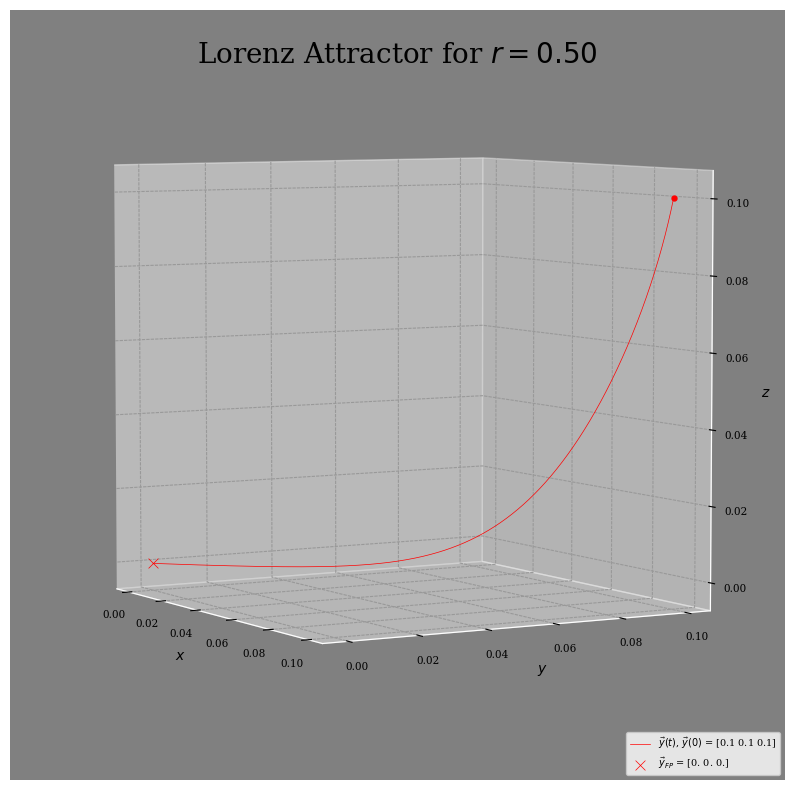

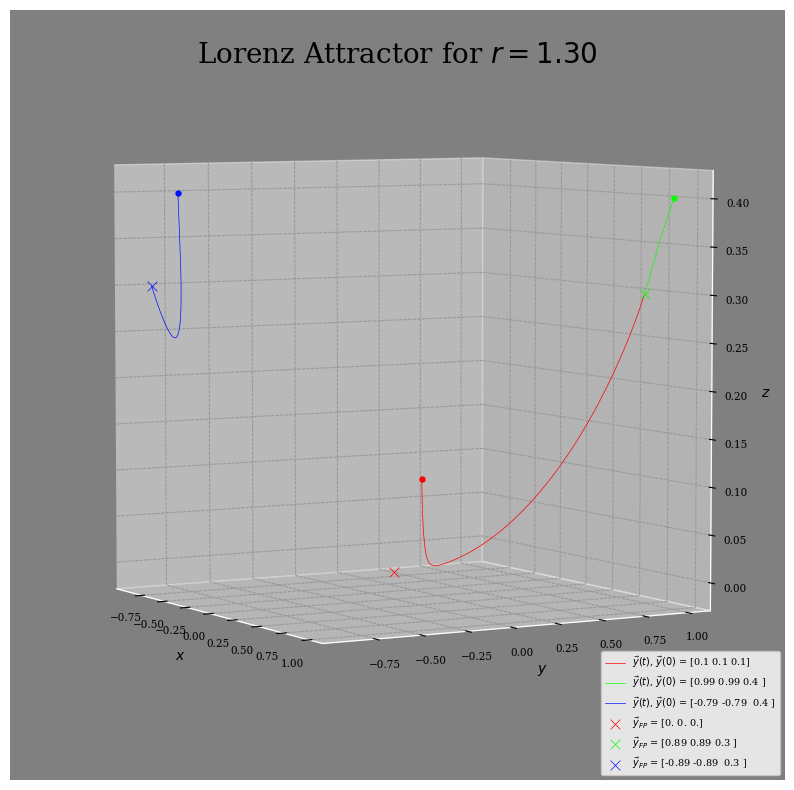

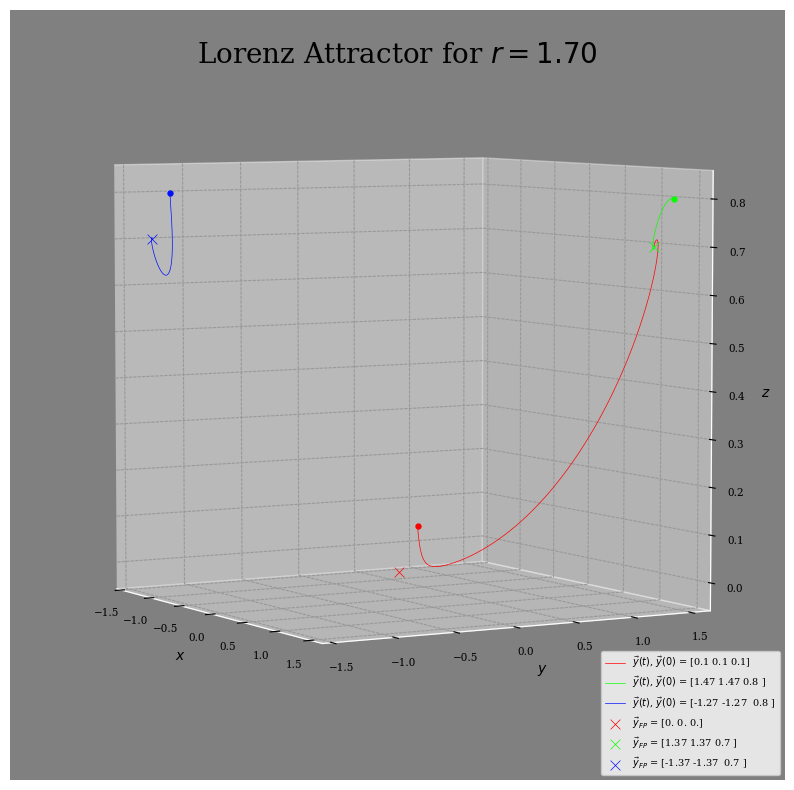

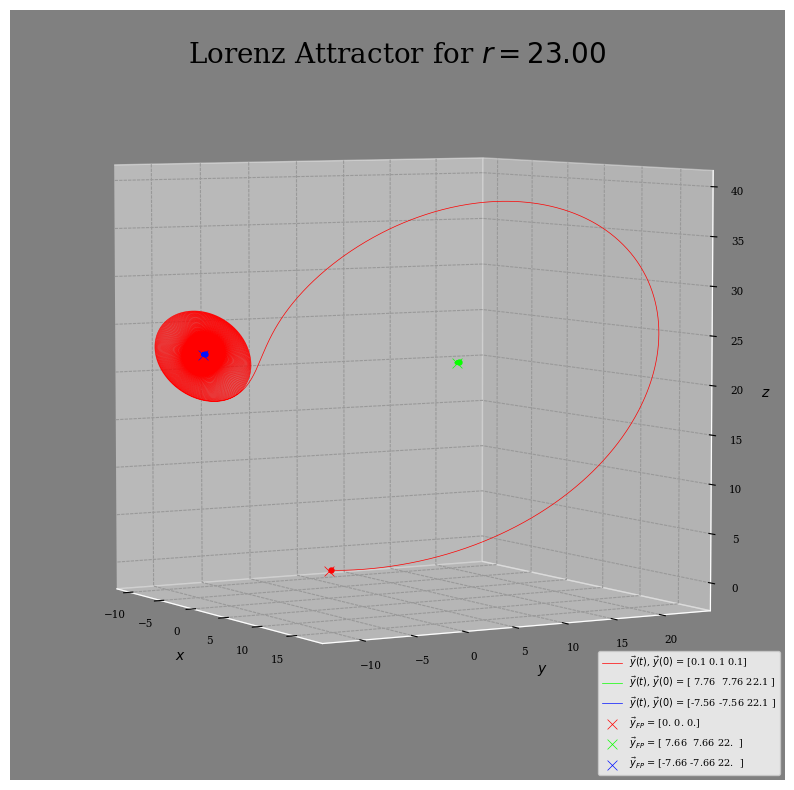

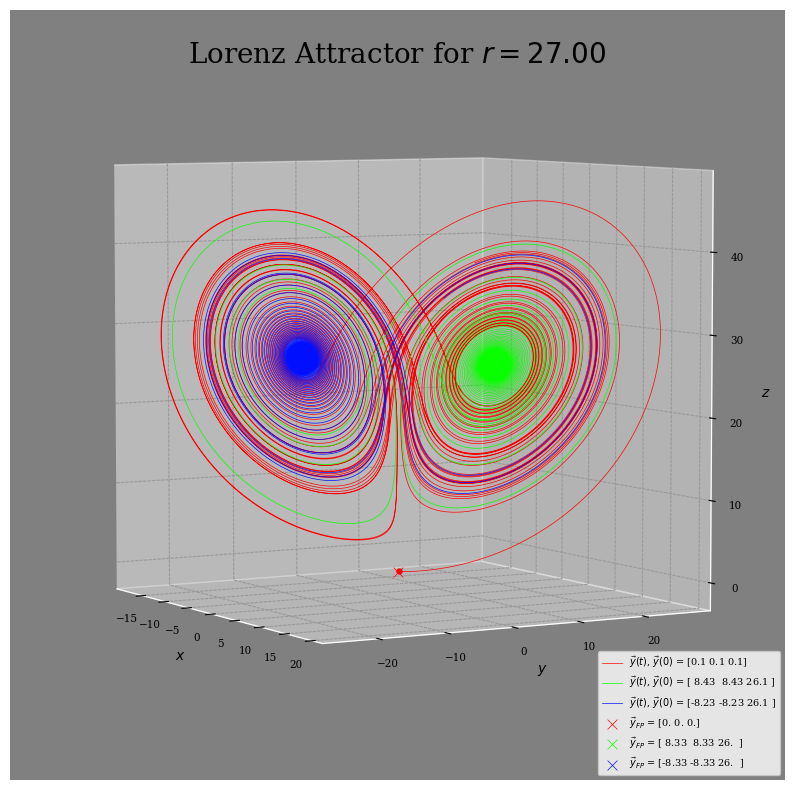

In [29]:
rs = np.array([0.5, 1.3, 1.7, 23.0, 27.0])
plot_lorenz(rs)

Plot 1: For $1 < r < 1.346$ the eigenvalues are still real and negative as one can see in the plot from the tutorial “zero points in the complex plane”. Therefore our solution is fully stable.<br>
Plot 2: For $1.346 < r < 24.74$ one eigenvalue $\lambda_1$ remains real and smaller than zero and the other two $\lambda_{2,3}$ are complex conjugates with a negative real part. Therefore our solution circulates towards the fixpoint.<br>
Plot 3: We discover that for $r = 23$ our solution is a “stable limit cycle”. The solution never reaches the fixpoint, but circulates around it infinitely. With our mathematical tools we can not say something about the existence of a “stable limit cycle”.<br>
Plot 4: For $r = 27$ the real part of the two complex eigenvalues is positive and our fixpoints become unstable. The solution circulates away from the first fixpoint and then jumps over to the second fixpoint. But because this fixpoint is also unstable it again circulates away and then jumps back to the first fixpoint and so on. The solution “oscillates” between the two fixpoints, but never reaches them as they are unstable. They can not escape as they are trapped because of the “volume contraction”. We can see the shape of a strange attractor!

## Task 2:
Determine the sequence $z_{k}$ for $r=27$, where $z_{k}$ is a local maximum in $z$ on the solution curve after $k$ periods. Plot $z_{k+1}$ as a function of $z_{k}$. When sufficient points are there, connect the points. The resulting function $z_{k+1}=f\left(z_{k}\right)$ has an intersection with the diagonal $z_{k+1}=z_{k}$. It is a fixed point of the function $f\left(z_{k}\right)$. Is the slope $m$ of this function $>1,<-1$ or between $-1$ and $+1 ?$ Notice: the theory of discrete maps says that there is NO periodic solution if $|m|>1$. So, in such a case we can deduce that this solution of the Lorenz system is not periodic.

In [ ]:
def lorenz_scipy(r):
    y0 = np.ones(3) 
    t = np.arange(0, 1e4, 1e-3)
    y = odeint(f, y0, t, (r,))
    return y

def plot_lorenz_map(y):
    z_k = y[:,2][peaks(y[:,2])[0]]
    z_fix = z_k[np.argmin(np.abs(np.diff(z_k)))]
    fig, ax = plt.figure(), plt.axes()
    ax.scatter(z_k[:-1], z_k[1:], marker="x", s=.1, color="tab:red", label=r"$(z_{k},z_{k+1})$")
    ax.vlines(z_fix, z_k.min(), z_k.max(), color="tab:orange", label=f"FP: z = {z_fix:.2f}")
    ax.plot([z_k.min(), z_k.max()], [z_k.min(), z_k.max()], color="tab:blue", label=r"$z_{k+1}=z_{k}$")
    ax.set_xlim(z_k.min(), z_k.max())
    ax.set_ylim(z_k.min(), z_k.max())
    ax.set_title("Lorenz Map")
    ax.legend()
    plt.show()
    pass

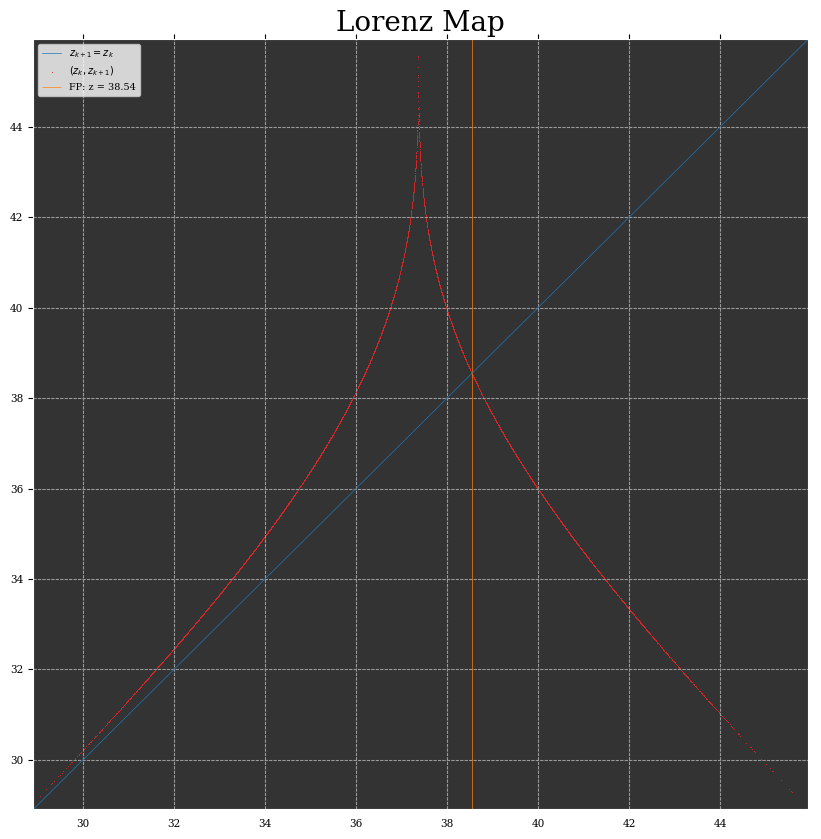

In [13]:
r = 27.
y = lorenz_scipy(r)
plot_lorenz_map(y)

As can be seen, the absolute value of the slope is always greater than one: $$\vert m \vert>1.$$
Therefore, we can deduce that the Lorenz System is not periodic.